In [1]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    print('GPU device not found')

Found GPU at: /device:GPU:0


In [2]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce GTX 1080 Ti


In [3]:
import pandas as pd

In [4]:
from numpy.random import RandomState
#%% Split whole dataset into train and valid set
df = pd.read_csv('mr/memo.csv', encoding='unicode_escape', header=0)
rng = RandomState()

train = df.sample(frac=0.9, random_state=rng)
test = df.loc[~df.index.isin(train.index)]
train.to_csv('train-memo.csv', index=False)
test.to_csv('test-memo.csv', index=False)

In [5]:
train_df = pd.read_csv("train-memo.csv", encoding='unicode_escape', header=0)

In [6]:
train_df

,sentiment,review
0,1,"Every morning, I was not presented with compli..."
1,1,"The location is not excellent, but you can not..."
2,2,"Lovely little hotel with great library views, ..."
3,2,"The waiter was so lovely and accommodating, th..."
4,2,"The living room is good, and the room style is..."
...,...,...
13565,1,"We have a sitting room and a tiny bedroom, but..."
13566,0,"The location and service can't be beaten, but ..."
13567,0,"There is a pool, but the pool is lacking, alth..."
13568,0,"When we arrived, the staff welcomed us and too..."


In [7]:
train_df.iloc[0][1]

C:\Users\huyen\AppData\Local\Temp\ipykernel_12940\1864895821.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_df.iloc[0][1]


'Every morning, I was not presented with complimentary pastries, including juices.'

In [8]:
test_df = pd.read_csv("test-memo.csv", encoding='unicode_escape', header=0)

In [9]:
test_df.shape

(1508, 2)

In [10]:
test_df.head()

,sentiment,review
0,0,"The front desk and staff were very welcoming, ..."
1,2,"The staff here is so friendly, and the hotel i..."
2,2,"The location is fantastic, and the rooms are m..."
3,1,Lovely location and the rooms are well appoint...
4,0,"When we arrived, the staff welcomed us and too..."


In [11]:
train_df['sentiment'] = (train_df['sentiment']).astype(int)
test_df['sentiment'] = (test_df['sentiment']).astype(int)

train_df.head(30)

,sentiment,review
0,1,"Every morning, I was not presented with compli..."
1,1,"The location is not excellent, but you can not..."
2,2,"Lovely little hotel with great library views, ..."
3,2,"The waiter was so lovely and accommodating, th..."
4,2,"The living room is good, and the room style is..."
5,1,"The hotel is excellent, the rooms and bedroom ..."
6,2,"The sitting room was normal, and the hotel sty..."
7,0,The location is not perfect but the airport is...
8,0,We were happy with the bedroom but dissatisfie...
9,0,"I would not advise the city bus, and let's try..."


In [12]:
test_df.head()

,sentiment,review
0,0,"The front desk and staff were very welcoming, ..."
1,2,"The staff here is so friendly, and the hotel i..."
2,2,"The location is fantastic, and the rooms are m..."
3,1,Lovely location and the rooms are well appoint...
4,0,"When we arrived, the staff welcomed us and too..."


In [13]:
train_df_bert = pd.DataFrame({
    "id": range(len(train_df)),
    "label": train_df['sentiment'],
    "sentence": train_df['review'].replace(r'\n', ' ', regex=True)
})

train_df_bert.head()

,id,label,sentence
0,0,1,"Every morning, I was not presented with compli..."
1,1,1,"The location is not excellent, but you can not..."
2,2,2,"Lovely little hotel with great library views, ..."
3,3,2,"The waiter was so lovely and accommodating, th..."
4,4,2,"The living room is good, and the room style is..."


In [14]:
train_df_bert

,id,label,sentence
0,0,1,"Every morning, I was not presented with compli..."
1,1,1,"The location is not excellent, but you can not..."
2,2,2,"Lovely little hotel with great library views, ..."
3,3,2,"The waiter was so lovely and accommodating, th..."
4,4,2,"The living room is good, and the room style is..."
...,...,...,...
13565,13565,1,"We have a sitting room and a tiny bedroom, but..."
13566,13566,0,"The location and service can't be beaten, but ..."
13567,13567,0,"There is a pool, but the pool is lacking, alth..."
13568,13568,0,"When we arrived, the staff welcomed us and too..."


In [15]:
train_df_bert = train_df_bert.iloc[0:10000]

In [16]:
train_df_bert

,id,label,sentence
0,0,1,"Every morning, I was not presented with compli..."
1,1,1,"The location is not excellent, but you can not..."
2,2,2,"Lovely little hotel with great library views, ..."
3,3,2,"The waiter was so lovely and accommodating, th..."
4,4,2,"The living room is good, and the room style is..."
...,...,...,...
9995,9995,1,"The room is not a gem with old-world charm, al..."
9996,9996,2,"There is a good style, and the waiter is frien..."
9997,9997,2,It has an excellent location in mid-Manhattan ...
9998,9998,1,"The area is always perfect, except for the wro..."


In [17]:
test_df_bert = pd.DataFrame({
    "id": range(len(test_df)),
    "label": test_df['sentiment'],
    "sentence": test_df['review'].replace(r'\n', ' ', regex=True)
})

test_df_bert.head()

,id,label,sentence
0,0,0,"The front desk and staff were very welcoming, ..."
1,1,2,"The staff here is so friendly, and the hotel i..."
2,2,2,"The location is fantastic, and the rooms are m..."
3,3,1,Lovely location and the rooms are well appoint...
4,4,0,"When we arrived, the staff welcomed us and too..."


In [18]:
test_df_bert = test_df_bert.iloc[0:3000]

In [19]:
test_df_bert

,id,label,sentence
0,0,0,"The front desk and staff were very welcoming, ..."
1,1,2,"The staff here is so friendly, and the hotel i..."
2,2,2,"The location is fantastic, and the rooms are m..."
3,3,1,Lovely location and the rooms are well appoint...
4,4,0,"When we arrived, the staff welcomed us and too..."
...,...,...,...
1503,1503,1,"There is not a fantastic bedroom, but the bed ..."
1504,1504,2,I've stayed at 4 and 5 star hotels all over Ma...
1505,1505,1,We stayed at this property in October for a we...
1506,1506,2,"The waiter was young and not as experienced, e..."


In [20]:
# Get the lists of sentences and their labels.
train_sentences = train_df_bert.sentence.values
train_labels = train_df_bert.label.values

In [21]:
# Get the lists of sentences and their labels.
test_sentences = test_df_bert.sentence.values
test_labels = test_df_bert.label.values

In [22]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [23]:
# Print the original sentence.
print(' Original: ', train_sentences[1])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(train_sentences[1]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(train_sentences[1])))

 Original:  The location is not excellent, but you can not quickly go to the subway.
Tokenized:  ['the', 'location', 'is', 'not', 'excellent', ',', 'but', 'you', 'can', 'not', 'quickly', 'go', 'to', 'the', 'subway', '.']
Token IDs:  [1996, 3295, 2003, 2025, 6581, 1010, 2021, 2017, 2064, 2025, 2855, 2175, 2000, 1996, 10798, 1012]


In [24]:
import warnings
warnings.filterwarnings('ignore')

max_len_train = 0

# For every sentence...
for sent in train_sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_train = max(max_len_train, len(input_ids))

print('Max sentence length: ', max_len_train)

Max sentence length:  60


In [25]:
max_len_test = 0

# For every sentence...
for sent in test_sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_test = max(max_len_test, len(input_ids))

print('Max sentence length: ', max_len_test)

Max sentence length:  60


In [26]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in train_sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 200,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                        truncation=True
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(train_labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', train_sentences[0])
print('Token IDs:', input_ids[0])

Original:  Every morning, I was not presented with complimentary pastries, including juices.
Token IDs: tensor([  101,  2296,  2851,  1010,  1045,  2001,  2025,  3591,  2007, 19394,
         5649,  2627,  5134,  1010,  2164, 10869,  2015,  1012,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,   

In [27]:

train_df_bert.head()

,id,label,sentence
0,0,1,"Every morning, I was not presented with compli..."
1,1,1,"The location is not excellent, but you can not..."
2,2,2,"Lovely little hotel with great library views, ..."
3,3,2,"The waiter was so lovely and accommodating, th..."
4,4,2,"The living room is good, and the room style is..."


In [28]:
(x_train, y_train), (x_test, y_test) = (train_df_bert.sentence,train_df_bert.label),(test_df_bert.sentence,test_df_bert.label)

In [29]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [30]:
from keras_preprocessing.sequence import pad_sequences
# 2 - Define the number of words to be used from a review (truncate and pad input sequences)
print('Pad sequences (samples x time)')

max_review_length = 60

x_train = pad_sequences(x_train, maxlen=max_review_length)
print('X_train shape:',x_train.shape)
x_test = pad_sequences(x_test, maxlen=max_review_length)
print('X_test shape:',x_test.shape)

Pad sequences (samples x time)
X_train shape: (10000, 60)
X_test shape: (1508, 60)


In [31]:
from keras import backend as K
from tensorflow import keras
import tensorflow as tf

class FuzzyLayer(keras.layers.Layer):

    def __init__(self, 
                 output_dim, 
                 initial_centers=None,
                 initial_sigmas=None, 
                 **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        self.output_dim = output_dim
        self.initial_centers = initial_centers
        self.initial_sigmas = initial_sigmas
        super(FuzzyLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.input_dimensions = list(input_shape)[:-1:-1]

        c_init_values =[]
        
        if self.initial_centers is None:
            c_init_values= tf.random_uniform_initializer(-1, 1)(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            c_init_values =tf.convert_to_tensor(self.initial_centers, dtype="float32")
        self.c = tf.Variable(initial_value= c_init_values, trainable=True)

        a_init_values = []
        if self.initial_sigmas is None:
            a_init_values = tf.ones_initializer()(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            a_init_values = tf.convert_to_tensor(self.initial_sigmas, dtype="float32")
        self.a = tf.Variable(initial_value= a_init_values, trainable=True)
        super(FuzzyLayer, self).build(input_shape)  

    def call(self, x):
        
        aligned_x = K.repeat_elements(K.expand_dims(x, axis = -1), self.output_dim, -1)
        aligned_c = self.c
        aligned_a = self.a
        for dim in self.input_dimensions:
            aligned_c = K.repeat_elements(K.expand_dims(aligned_c, 0), dim, 0)
            aligned_a = K.repeat_elements(K.expand_dims(aligned_a, 0), dim, 0)

        xc = K.exp(-K.sum(K.square((aligned_x - aligned_c) / (2 * aligned_a)), axis=-2, keepdims=False))
        
        return xc
        
    def compute_output_shape(self, input_shape):
        return tuple(input_shape[:-1]) + (self.output_dim,)


In [32]:
import tensorflow as tf
from tensorflow import keras
from keras import backend as K

class DefuzzyLayer(keras.layers.Layer):

    def __init__(self, 
                 output_dim, 
                 initial_rules_outcomes=None,
                 **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        self.output_dim = output_dim
        self.initial_rules_outcomes = initial_rules_outcomes
        super(DefuzzyLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.input_dimensions = list(input_shape)[:-1:-1]

        outcomes_init_values = []
        if self.initial_rules_outcomes is None:
            outcomes_init_values = tf.random_uniform_initializer()(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            outcomes_init_values = tf.convert_to_tensor(self.initial_rules_outcomes, dtype="float32")
        
        self.rules_outcome = tf.Variable(initial_value = outcomes_init_values, trainable=True)
        
        super(DefuzzyLayer, self).build(input_shape)  

    def call(self, x):
        aligned_x = K.repeat_elements(K.expand_dims(x, axis = -1), self.output_dim, -1)
        aligned_rules_outcome = self.rules_outcome
        for dim in self.input_dimensions:
            aligned_rules_outcome = K.repeat_elements(K.expand_dims(aligned_rules_outcome, 0), dim, 0)
        
        xc = K.sum((aligned_x * aligned_rules_outcome), axis=-2, keepdims=False)
        return xc
        
    def compute_output_shape(self, input_shape):
        return tuple(input_shape[:-1]) + (self.output_dim,)
    
    def get_config(self):
        return {"rules_outcome": self.rules_outcome.numpy()}


In [33]:
#FuzzyCNNLSTM
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation, Flatten
from keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D,MaxPooling1D
from keras.layers import Embedding
import matplotlib.pyplot as plt
#from FuzzyLayer import FuzzyLayer
#from DefuzzyLayer import DefuzzyLayer

# 3 - Neural network model design
print('Building model')
max_features = 2000
embedding_vector_length = 32

filters = 32
kernel_size = 3
hidden_dims = 40
nb_classes = 3
#input_shape=x_train.shape
model = Sequential()
model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))

model.add(Conv1D(filters=32, kernel_size=5, padding='same', activation='relu',))
model.add(Dropout(0.1))
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(30,activation='tanh',
                             recurrent_activation='sigmoid',
                             return_state=False,
                             return_sequences=False)))
model.add(Dropout(0.1))
model.add(FuzzyLayer(20, input_dim=2))
model.add(Dropout(0.1))
model.add(DefuzzyLayer(10))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))
#model.add(Dense(1, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Building model
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 60, 32)            64000     
_________________________________________________________________
conv1d (Conv1D)              (None, 60, 32)            5152      
_________________________________________________________________
dropout (Dropout)            (None, 60, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 60, 32)            4128      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 60, 32)            3104      
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 3

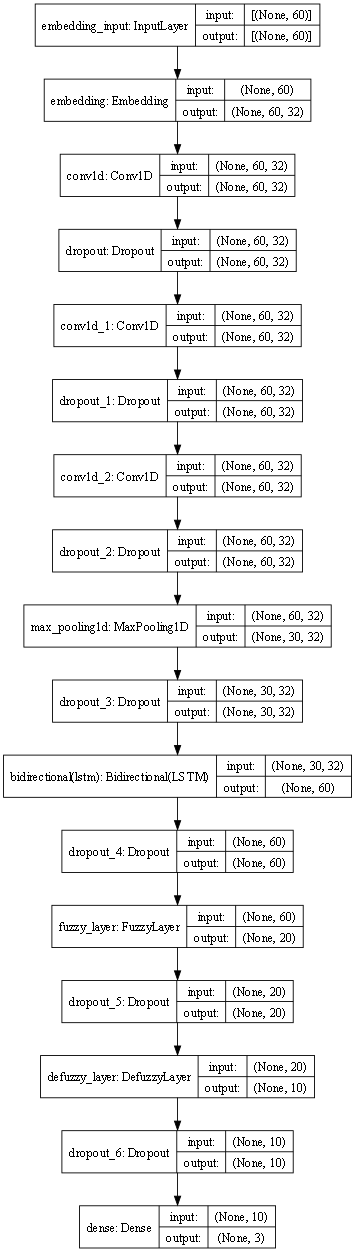

In [34]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
tf.keras.utils.plot_model(model, show_shapes=True, dpi=64)

In [36]:
import numpy
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# 4 - Train the neural network model
history = model.fit(x_train, y_train,
                    epochs=20,
                    verbose=True,
                    callbacks=[es_callback],
                    #validation_data=(x_test, y_test),
                    validation_split=0.1,
                    batch_size=10)

loss, accuracy = model.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.6f}".format(accuracy))
print("Training Loss: {:.6f}".format(loss))
loss, accuracy = model.evaluate(x_test, y_test, verbose=True)
print("Testing Accuracy:  {:.6f}".format(accuracy))
print("Testing Loss:  {:.6f}".format(loss))


Epoch 1/20
900/900 [==============================] - 12s 13ms/step - loss: 0.1258 - accuracy: 0.9434 - val_loss: 0.0885 - val_accuracy: 0.9460
Epoch 2/20
900/900 [==============================] - 12s 13ms/step - loss: 0.1052 - accuracy: 0.9496 - val_loss: 0.0863 - val_accuracy: 0.9500
Epoch 3/20
900/900 [==============================] - 12s 14ms/step - loss: 0.1053 - accuracy: 0.9493 - val_loss: 0.0800 - val_accuracy: 0.9590
Epoch 4/20
900/900 [==============================] - 12s 14ms/step - loss: 0.1146 - accuracy: 0.9497 - val_loss: 0.0744 - val_accuracy: 0.9640
Epoch 5/20
900/900 [==============================] - 12s 14ms/step - loss: 0.1054 - accuracy: 0.9534 - val_loss: 0.0777 - val_accuracy: 0.9540
Epoch 6/20
900/900 [==============================] - 12s 13ms/step - loss: 0.0967 - accuracy: 0.9557 - val_loss: 0.0791 - val_accuracy: 0.9530
Epoch 7/20
313/313 [==============================] - 2s 6ms/step - loss: 0.0915 - accuracy: 0.9609
Training Accuracy: 0.960900
Training

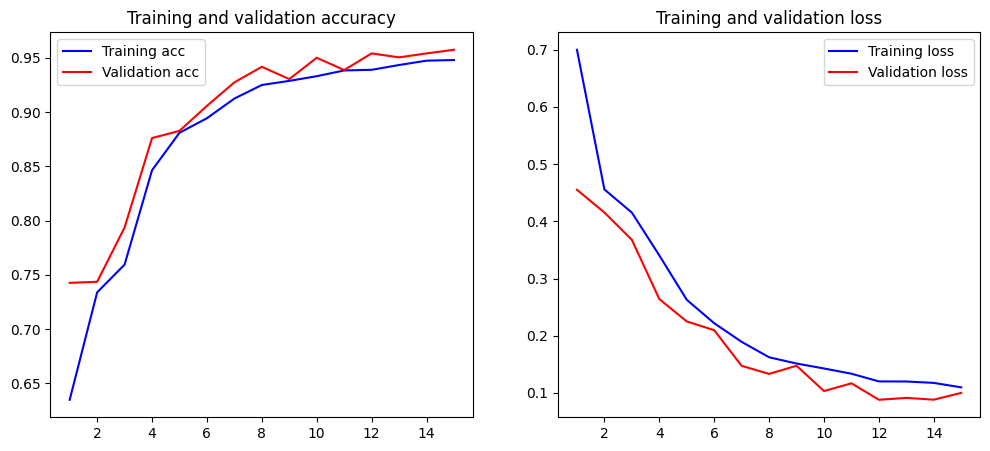

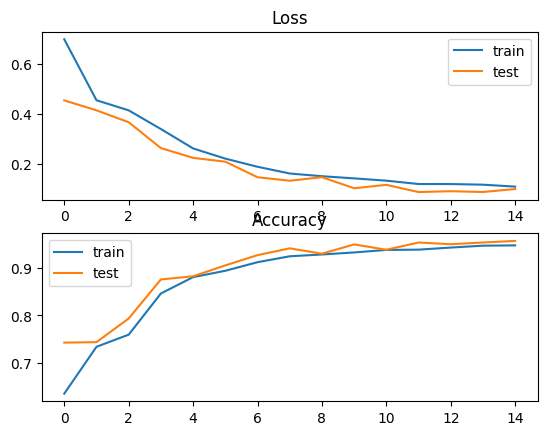

In [129]:
import matplotlib.pyplot as plt
#% matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()